In [1]:
import pandas as pd

df = pd.read_excel (r'/Users/naidanzheng/Desktop/DATA 606/alltweets.xlsx')

In [2]:
df

Unnamed: 0                           _type  \
0               0  snscrape.modules.twitter.Tweet   
1               1  snscrape.modules.twitter.Tweet   
2               2  snscrape.modules.twitter.Tweet   
3               3  snscrape.modules.twitter.Tweet   
4               4  snscrape.modules.twitter.Tweet   
...           ...                             ...   
17995         995  snscrape.modules.twitter.Tweet   
17996         996  snscrape.modules.twitter.Tweet   
17997         997  snscrape.modules.twitter.Tweet   
17998         998  snscrape.modules.twitter.Tweet   
17999         999  snscrape.modules.twitter.Tweet   

                                                     url                date  \
0      https://twitter.com/purplgrl5/status/124477630... 2020-03-30 23:59:32   
1      https://twitter.com/scarfizal/status/124477617... 2020-03-30 23:59:02   
2      https://twitter.com/PDBiz33/status/12447760961... 2020-03-30 23:58:42   
3      https://twitter.com/PDBiz33/status/12447758827... 2020-03-30 23:57:51   
4      https://twitter.com/citrusstudios/status/12447... 2020-03-30 23:55:42   
...                                                  ...                 ...   
17995  https://twitter.com/rmchavin/status/1432460697... 2021-08-30 21:50:18   
17996  https://twitter.com/Labor_Law/status/143246066... 2021-08-30 21:50:12   
17997  https://twitter.com/DeschutesCounty/status/143... 2021-08-30 21:50:01   
17998  https://twitter.com/nationworldnews/status/143... 2021-08-30 21:49:46   
17999  https://twitter.com/CathBird5/status/143246056... 2021-08-30 21:49:46   

                                                 content  \
0      @g Also,  there is flu vaccine every year that...   
1      Coronavirus treatments: Chloroquine, vaccines ...   
2      COVID-19 Vaccine has been under our kitchen si...   
3      @barstoolsports @joerogan\n@bertkreischer \nCO...   
4      Coronavirus (Covid-19)\n\nSteps to Prevent Ill...   
...                                                  ...   
17995  8-29-2021:  Putin sends another 50,000 doses o...   
17996  Will They or Won’t They? California Lawmakers ...   
17997  We know your time is valuable. When you get yo...   
17998  Quebec Ministry of Health recommends third dos...   
17999  Australians, Please sign the petition on Aust ...   

                                         renderedContent                   id  \
0      @g Also,  there is flu vaccine every year that...  1244776302982450944   
1      Coronavirus treatments: Chloroquine, vaccines ...  1244776179921498112   
2      COVID-19 Vaccine has been under our kitchen si...  1244776096135926016   
3      @barstoolsports @joerogan\n@bertkreischer \nCO...  1244775882780111104   
4      Coronavirus (Covid-19)\n\nSteps to Prevent Ill...  1244775341694030080   
...                                                  ...                  ...   
17995  8-29-2021:  Putin sends another 50,000 doses o...  1432460697577816064   
17996  Will They or Won’t They? California Lawmakers ...  1432460669207514880   
17997  We know your time is valuable. When you get yo...  1432460626203382016   
17998  Quebec Ministry of Health recommends third dos...  1432460561959244032   
17999  Australians, Please sign the petition on Aust ...  1432460561032179968   

                                                    user  replyCount  \
0      {'_type': 'snscrape.modules.twitter.User', 'us...           0   
1      {'_type': 'snscrape.modules.twitter.User', 'us...           0   
2      {'_type': 'snscrape.modules.twitter.User', 'us...           0   
3      {'_type': 'snscrape.modules.twitter.User', 'us...           0   
4      {'_type': 'snscrape.modules.twitter.User', 'us...           0   
...                                                  ...         ...   
17995  {'_type': 'snscrape.modules.twitter.User', 'us...           0   
17996  {'_type': 'snscrape.modules.twitter.User', 'us...           0   
17997  {'_type': 'snscrape.modules.twitter.User', 'us...           

In [3]:
df.shape

(18000, 33)

In [4]:
df.dtypes

Unnamed: 0                   int64
_type                       object
url                         object
date                datetime64[ns]
content                     object
renderedContent             object
id                           int64
user                        object
replyCount                   int64
retweetCount                 int64
likeCount                    int64
quoteCount                   int64
conversationId               int64
lang                        object
source                      object
sourceUrl                   object
sourceLabel                 object
outlinks                    object
tcooutlinks                 object
media                       object
retweetedTweet             float64
quotedTweet                 object
inReplyToTweetId           float64
inReplyToUser               object
mentionedUsers              object
coordinates                 object
place                       object
hashtags                    object
cashtags            

In [5]:
df['nltk_sentiment'].value_counts()

Positive    7665
Neutral     5908
Negative    4427
Name: nltk_sentiment, dtype: int64

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# NLP packages
import nltk  # the most famous python module for NLP techniques
from nltk import word_tokenize
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from wordcloud import WordCloud # to express the words in a word cloud (words review visualization)

# Modeling packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 14, 6
plt.style.use('ggplot')

import nltk
nltk.download('punkt') 
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/naidanzheng/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/naidanzheng/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

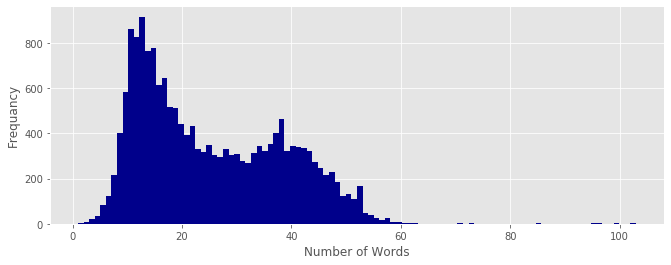

In [7]:
numof_words_per_review = df.content.apply(lambda x: len(x.split(" ")))
numof_words_per_review.hist(bins=100, color='darkblue', figsize=(11, 4))
plt.xlabel('Number of Words')
plt.ylabel('Frequancy')
plt.show()

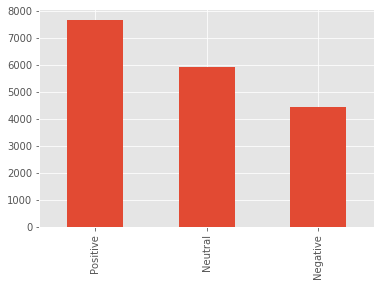

In [8]:
df['nltk_sentiment'].value_counts().plot(kind='bar')

In [9]:
texts = df['content']
texts.head()

0    @g Also,  there is flu vaccine every year that...
1    Coronavirus treatments: Chloroquine, vaccines ...
2    COVID-19 Vaccine has been under our kitchen si...
3    @barstoolsports @joerogan\n@bertkreischer \nCO...
4    Coronavirus (Covid-19)\n\nSteps to Prevent Ill...
Name: content, dtype: object

In [10]:
import re
remove_url = lambda x: re.sub(r'https\S+', '', str(x))
texts_lr = texts.apply(remove_url)
texts_lr.head()

0    @g Also,  there is flu vaccine every year that...
1    Coronavirus treatments: Chloroquine, vaccines ...
2    COVID-19 Vaccine has been under our kitchen si...
3    @barstoolsports @joerogan\n@bertkreischer \nCO...
4    Coronavirus (Covid-19)\n\nSteps to Prevent Ill...
Name: content, dtype: object

In [11]:
to_lower = lambda x : x.lower()
texts_lc = texts_lr.apply(to_lower)
texts_lc.head()

0    @g also,  there is flu vaccine every year that...
1    coronavirus treatments: chloroquine, vaccines ...
2    covid-19 vaccine has been under our kitchen si...
3    @barstoolsports @joerogan\n@bertkreischer \nco...
4    coronavirus (covid-19)\n\nsteps to prevent ill...
Name: content, dtype: object

In [12]:
import string
rmv_pcs = lambda x : x.translate(str.maketrans('', '', string.punctuation))
texts_pcs = texts_lc.apply(rmv_pcs)
texts_pcs

0        g also  there is flu vaccine every year that o...
1        coronavirus treatments chloroquine vaccines an...
2        covid19 vaccine has been under our kitchen sin...
3        barstoolsports joerogan\nbertkreischer \ncovid...
4        coronavirus covid19\n\nsteps to prevent illnes...
                               ...                        
17995    8292021  putin sends another 50000 doses of ga...
17996    will they or won’t they california lawmakers c...
17997    we know your time is valuable when you get you...
17998    quebec ministry of health recommends third dos...
17999    australians please sign the petition on aust g...
Name: content, Length: 18000, dtype: object

In [13]:
from nltk.corpus import stopwords

update_words = ['covid','#coronavirus', '#coronavirusoutbreak', '#coronavirusPandemic', '#covid19', '#covid_19', '#epitwitter', '#ihavecorona', 'amp', 'coronavirus', 'covid19']
stop_words = set(stopwords.words('english'))
stop_words.update(update_words)

remove_words = lambda x : ' '.join([word for word in x.split() if word not in stop_words])
texts_rs = texts_pcs.apply(remove_words)
texts_rs.head()

0    g also flu vaccine every year 46 americans get...
1    treatments chloroquine vaccines drugs fighting...
2    vaccine kitchen sinks noses along members town...
3    barstoolsports joerogan bertkreischer vaccine ...
4    steps prevent illness currently vaccine preven...
Name: content, dtype: object

In [14]:
word_list = [word for line in texts_rs for word in line.split()]
word_list[:10]

['g',
 'also',
 'flu',
 'vaccine',
 'every',
 'year',
 '46',
 'americans',
 'get',
 'contributes']

In [15]:
import plotly.express as px

word_counts = Counter(word_list).most_common(50)
words_df = pd.DataFrame(word_counts)
words_df.columns = ['word', 'freq']

px.bar(words_df, x='word', y='freq', title='Most Common Words')

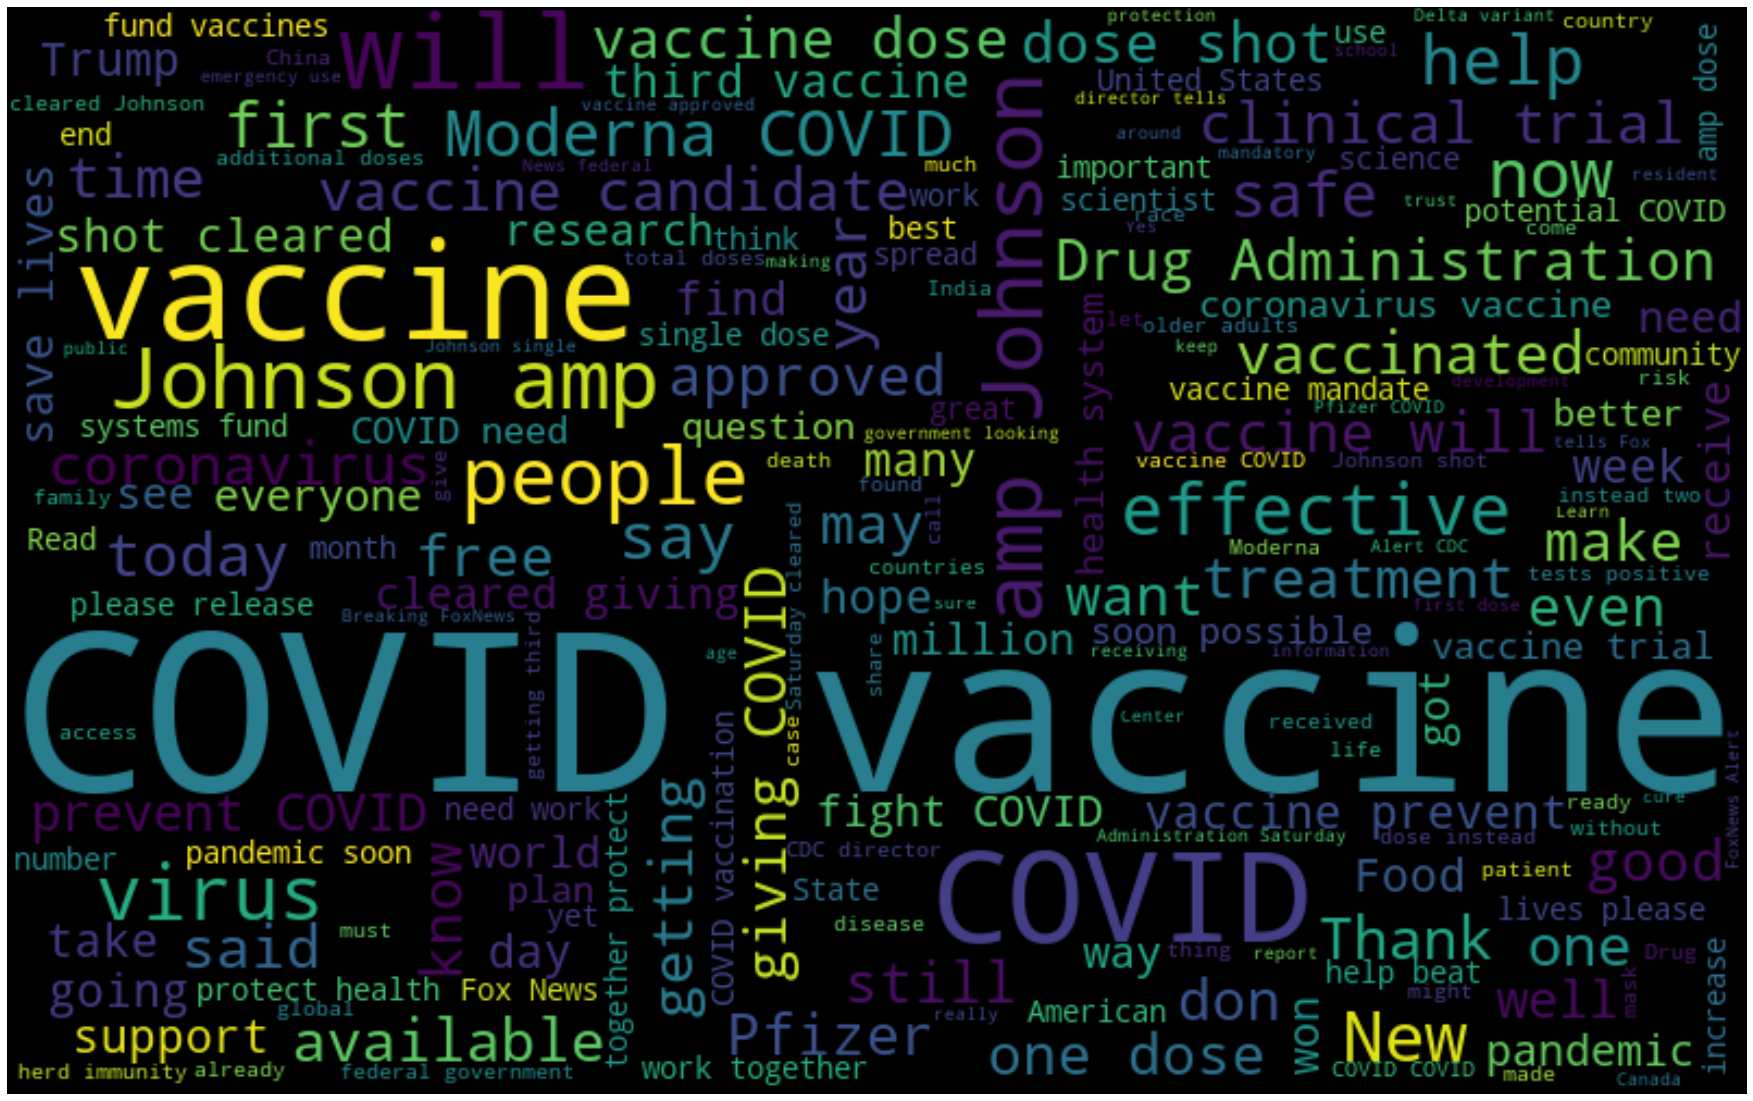

In [16]:
normal_words = ' '.join([text for text in df['newcontent'][df['nltk_sentiment'] == 'Positive']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(40, 20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

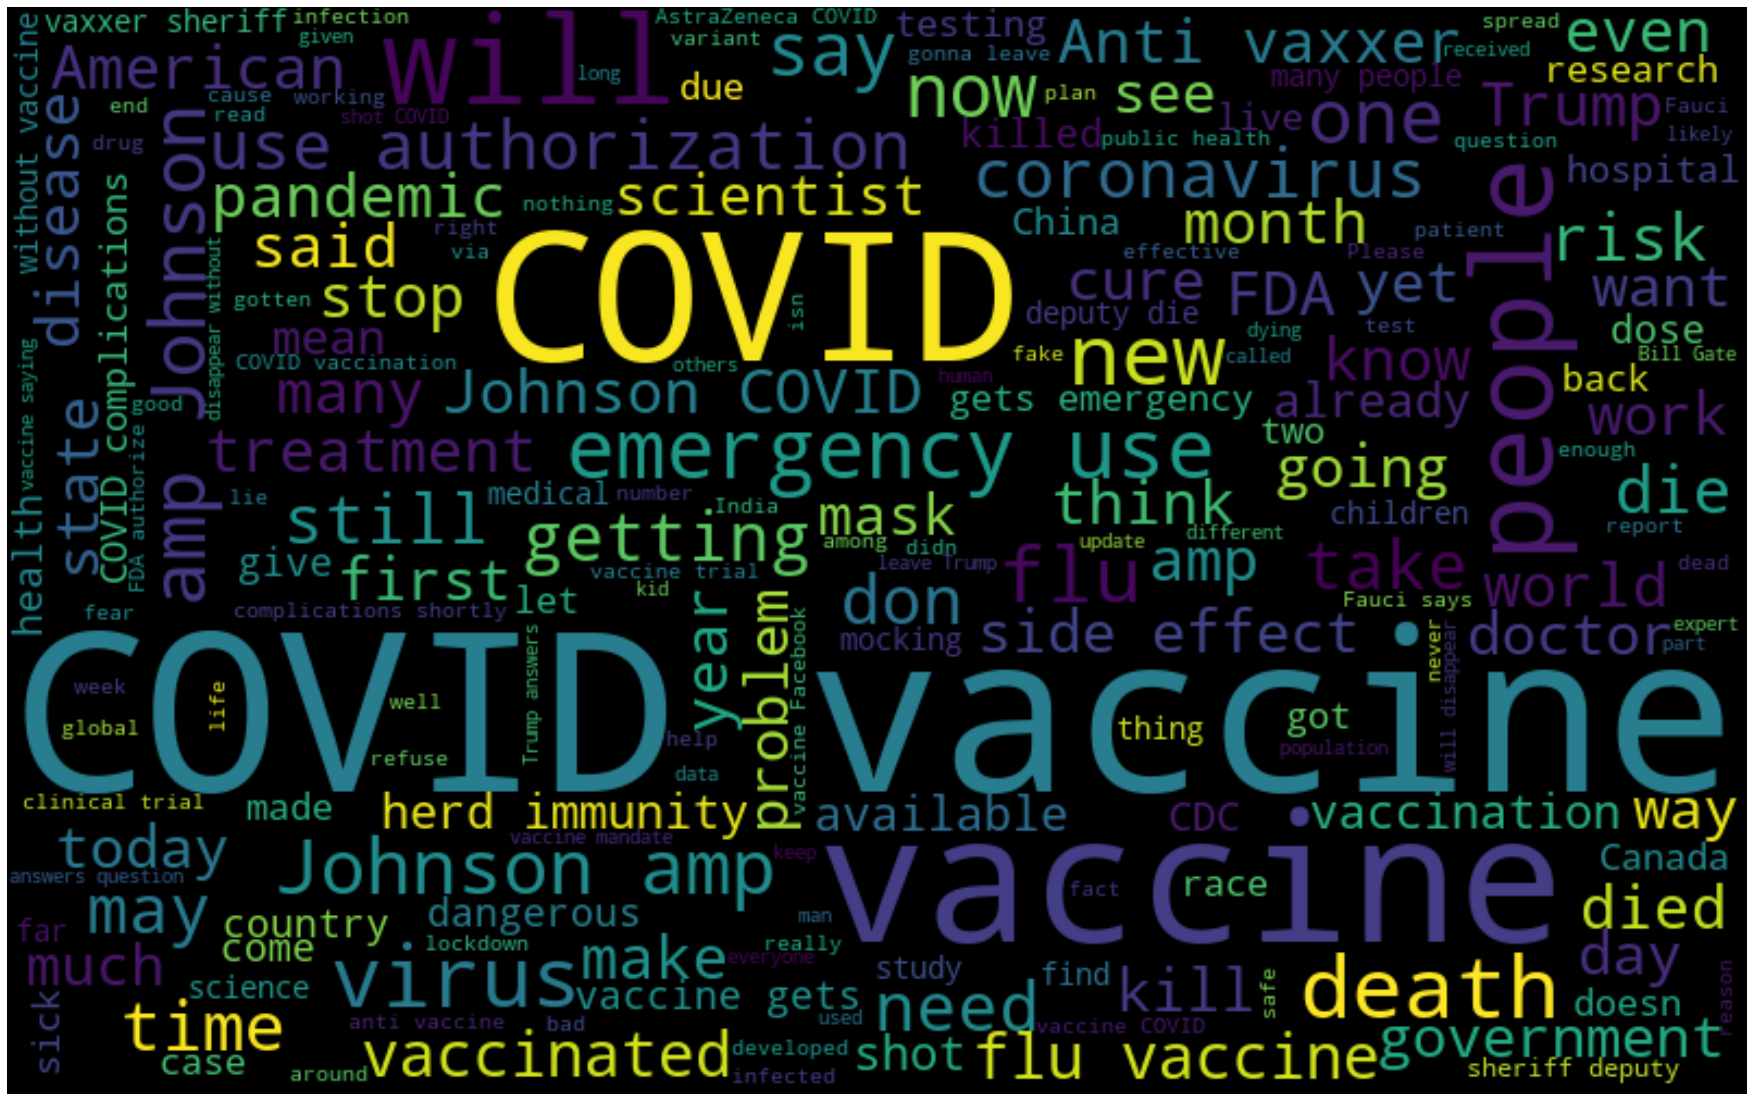

In [17]:
normal_words = ' '.join([text for text in df['newcontent'][df['nltk_sentiment'] == 'Negative']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(40, 20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000., 8000.]),
 <a list of 9 Text yticklabel objects>)

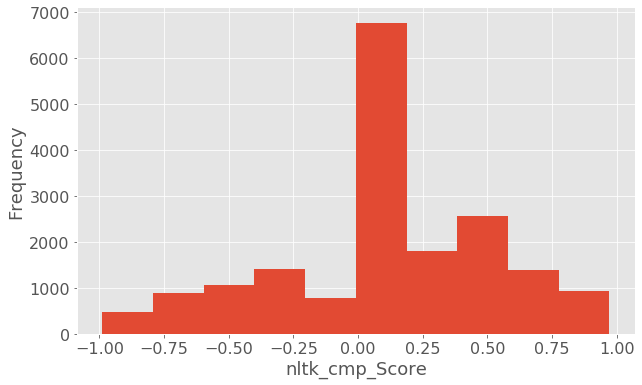

In [19]:
fig = plt.figure(figsize=(10, 6))
df['nltk_cmp_score'].hist()
plt.xlabel('nltk_cmp_Score', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

In [23]:
df.sort_values(by='nltk_cmp_score', ascending=False)[['content','nltk_sentiment']].reset_index(drop=True).head(n=10)

content nltk_sentiment
0  @teensforvaxx @blueamongblue @Eric47689508 @em...       Positive
1  That I have a team like you guys who supports ...       Positive
2  I am thankful for many things over the past ye...       Positive
3  @Scorpio8 Love you brother, but you focus on C...       Positive
4  Chance to Win a once-in-a-lifetime vacation! G...       Positive
5  Someone articulated an "Ethical Framework" for...       Positive
6  @adriandix Thank you Minister Dix and Dr. Henr...       Positive
7  Let's come together to save lives.\nThe nation...       Positive
8  @Shackviral @ParisDaguerre Hello Jon,  I have ...       Positive
9  We’ve missed too many of life’s special moment...       Positive

In [24]:
timeline = df.groupby(['date']).count().reset_index()
timeline['count'] = timeline['content']
timeline = timeline[['date', 'count']]
fig = px.bar(timeline, x='date', y='count', labels={'date': 'Date', 'count': 'Tweet Count'})
fig.show()

In [27]:
# Remove today's date since data is incomplete
today = pd.Timestamp.today().date()
vax_tweets = df[df['date']!=today]

# Get counts of number of tweets by sentiment for each date
timeline = df.groupby(['date', 'nltk_sentiment']).agg(**{'tweets': ('id', 'count')}).reset_index().dropna()

# Plot results
import plotly.express as px
fig = px.line(timeline, x='date', y='tweets', color='nltk_sentiment', category_orders={'nltk_sentiment': ['neutral', 'negative', 'positive']},
             title='Timeline showing sentiment of tweets about COVID-19 vaccines')
fig.show()